# Laboratorijska vježba 5


##### Kratke crte o clusterinug:
- Unsupervised metod učenja
- Najzastupljeniji metod automatske segmentacije/grupisanja podataka
- Primjenu može naći i kao korak prije deep learning modela
- Vrlo popularno u customer/product segmentation
- Recommendation engines
- Pattern recognition
- Često korišten tool za analizu podataka

##### Prednosti:
- Jednostavnost
- Brzina
- Može raditi sa različitim tipovima podataka, dokle god je definisana "*udaljenost*"

##### Nedostaci:
- Teško za evaluirati kvalitet clusteringa, čak i u 2D problemima
- Metrike mogu zavarati
- Teško za odabrati pogodan klastering algoritam ukoliko se ne poznaju dovoljno dobro podaci


##### Distance metrics:

$\large D_{p}(X, Y) = {(\sum_{i=1}^{i=N}|x_{i} - y_{i}|^{p})}^{1/p}$
- Minkowski distance ($p \in \mathbb{Z}$)
- Manhattan distance (Minkowski p=1)
- Euclidean distance (Minkowski p=2)
- Hamming distance za udaljenost između 2 stringa/vektora (broj pozicija na kojima se razlikuju).

# Zadaci za vježbu

## Zadatak 1

Koristeći code u nastavku generisati dataset, a potom primijeniti k-means clustering. Grafički prikazati rezultat clusteringa ukoliko se za parametar $k$ odabere 1, 2, 3, i 4 clustera.  
Primjer generisane slike dat je ispod code-a. Potom, koristeći ili *Silhouette score* ili *Elbow method* odrediti optimalnu vrijednost broja clustera.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

In [2]:
def dataset_zadatak1() -> np.ndarray:
    # Pomocni code za generisanje kruznice
    r = np.random.randint(0, 100, 1000)
    fi = np.random.randint(0, 360, 1000)

    # Prvi klaster
    x1 = r*np.cos(fi) + 120
    y1 = r*np.sin(fi) + 250

    # Drugi klaster
    x2 = r*np.cos(fi) + 380
    y2 = r*np.sin(fi) + 250

    return np.concatenate((x1, x2)), np.concatenate((y1, y2))

In [3]:
def visualization(x, y, xlim1, xlim2, ylim1, ylim2):
    plt.figure(figsize=(8, 6))
    plt.xlim([xlim1, xlim2])
    plt.ylim([ylim1, ylim2])
    plt.axis("off")
    plt.scatter(x, y, c="k", alpha=0.5)

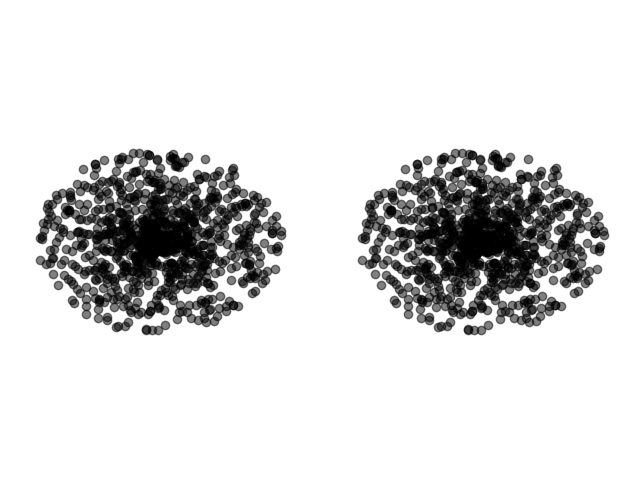

In [4]:
# Vizualizacija
x, y = dataset_zadatak1()

visualization(x, y, 0, 500, 0, 500)

In [5]:
def makeX(x, y):
    X = []
    for i in range(len(x)):
        X.append([x[i], y[i]])
    X = np.array(X)
    print(X.shape)
    return X

In [6]:
X = makeX(x, y)

(2000, 2)


In [7]:
# Primjena K-means klasterovanja za 1, 2, 3, i 4 klastera
sse= {}
for k in [1, 2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
    clusters = kmeans.labels_
    centers = kmeans.cluster_centers_
    sse[k] = kmeans.inertia_ # Inertia: zbir udaljenosti uzoraka od njihovog centroida

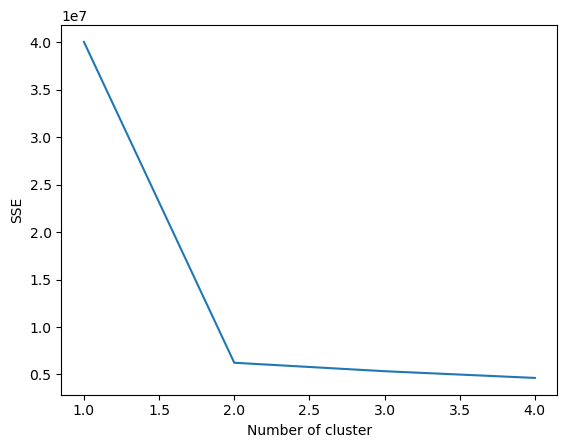

In [8]:
# Elbow method
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [9]:
# Primjenom Elbow metode vidimo da je optimalan broj klastera 2

In [10]:
def applayKMeans(n_clusters, x, y):
    X = makeX(x, y)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X)
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='r')
    
    # Plotanje klastera
    for i in range(n_clusters):
        plt.scatter(x[kmeans.labels_ == i], y[kmeans.labels_ == i], alpha=0.5)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
    plt.show()

(2000, 2)


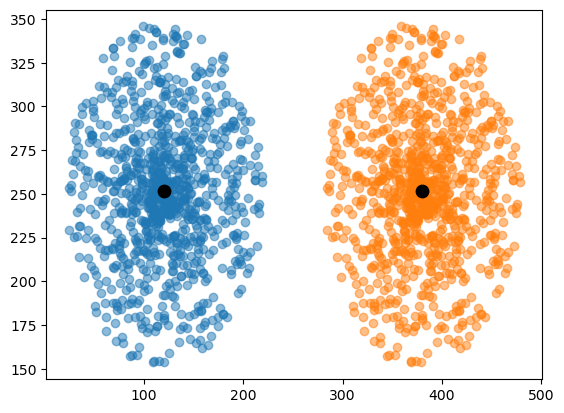

In [11]:
# Primjena K-means klasterovanja za 2 klastera
applayKMeans(2, x, y)

Potrebno je primijeniti klustering i generisati sliku sličnu narednoj (obojena dva klustera, vidljivi centroidi):

![Dva klustera](slika1.png)

## Zadatak 2

Koristeći code dat u nastavku generisati dataset i potom primijeniti k-means clustering.  
Prikazati rezultate clusteringa grafički kada se za broj clustera odabere 1, 2, 3 i 4:

In [12]:
def dataset_zadatak2():
    def generate_ellipse(a, b, N):
        x = np.zeros(N)
        y = np.zeros(N)
        cntr = 0
        while cntr < N:
            i = np.random.uniform(-a, a, 1)
            j = np.random.uniform(-b, b, 1)
            if i**2/a**2 + j**2/b**2 <= 1:
                x[cntr] = i
                y[cntr] = j
                cntr += 1
        return x, y
    
    x1, y1 = generate_ellipse(5, 20, 500)
    x1 = x1 - 25

    x2, y2 = generate_ellipse(5, 20, 500)
    x2 = x2 + 25
    return np.concatenate((x1, x2)), np.concatenate((y1, y2))

C:\Users\BasicBug\AppData\Local\Temp\ipykernel_9516\2551094936.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[cntr] = i
C:\Users\BasicBug\AppData\Local\Temp\ipykernel_9516\2551094936.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[cntr] = j


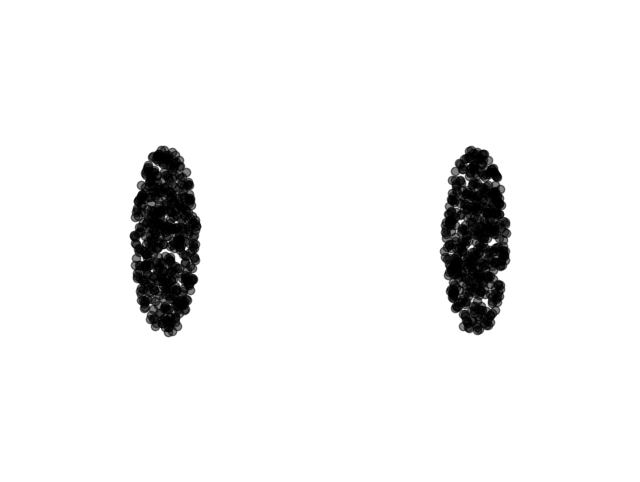

In [13]:
# Vizualizacija
x, y = dataset_zadatak2()

visualization(x, y, -50, 50, -50, 50)

(1000, 2)


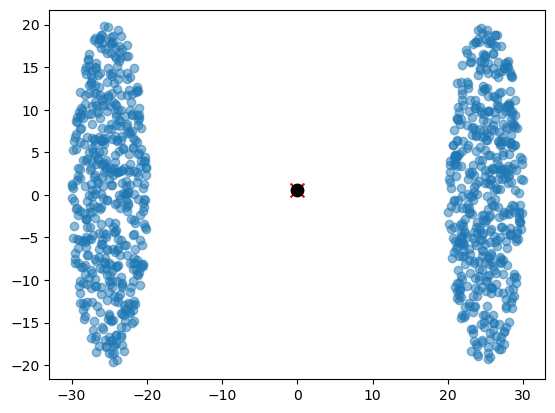

(1000, 2)


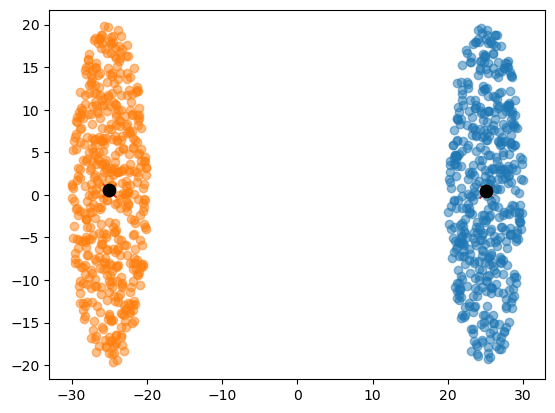

(1000, 2)


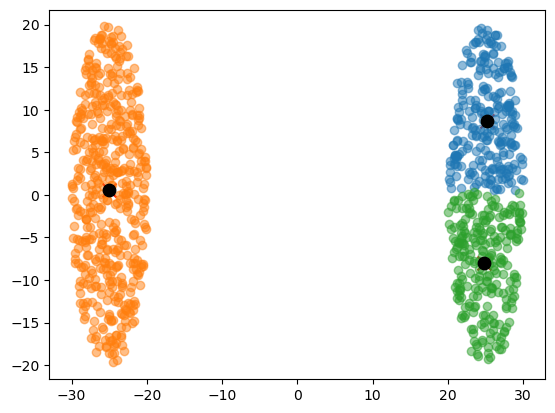

(1000, 2)


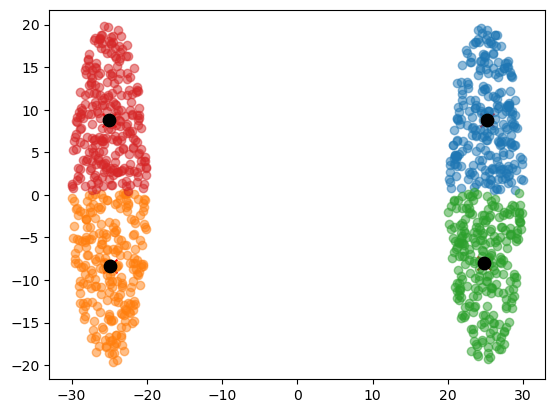

In [14]:
for i in [1, 2, 3, 4]:
    applayKMeans(i, x, y)

## Zadatak 3

Nad istim datasetom kao za zadatak 2 primijeniti DBscan.  
Grafički prikazati rezultat clusteringa i prokomentarisati.

In [15]:
def dataset_zadatak3():
    def generate_ellipse(a, b, N):
        x = np.zeros(N)
        y = np.zeros(N)
        cntr = 0
        while cntr < N:
            i = np.random.uniform(-a, a, 1)
            j = np.random.uniform(-b, b, 1)
            if i**2/a**2 + j**2/b**2 <= 1:
                x[cntr] = i
                y[cntr] = j
                cntr += 1
        return x, y
    
    x1, y1 = generate_ellipse(5, 20, 500)
    x1 = x1 - 25

    x2, y2 = generate_ellipse(5, 20, 500)
    x2 = x2 + 25
    return np.concatenate((x1, x2)).reshape(-1, 1), np.concatenate((y1, y2)).reshape(-1, 1)

C:\Users\BasicBug\AppData\Local\Temp\ipykernel_9516\1791180931.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[cntr] = i
C:\Users\BasicBug\AppData\Local\Temp\ipykernel_9516\1791180931.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[cntr] = j


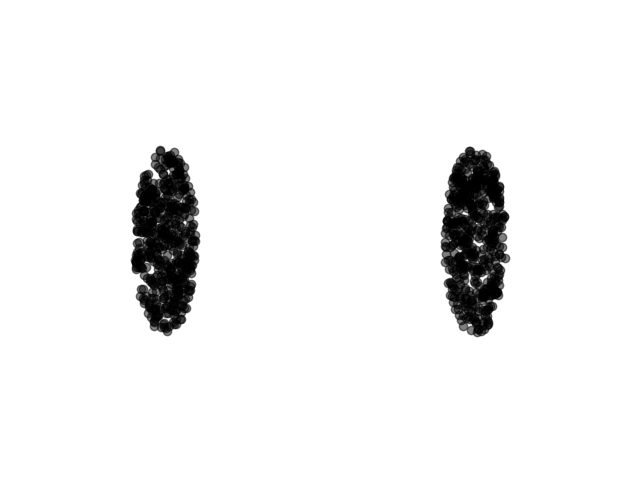

In [16]:
# Vizualizacija
x, y = dataset_zadatak3()

visualization(x, y, -50, 50, -50, 50)

In [17]:
# Primjena DBSCAN klasterovanja
dbscan = DBSCAN(eps=3, min_samples=2).fit(np.concatenate((x, y), axis=1))

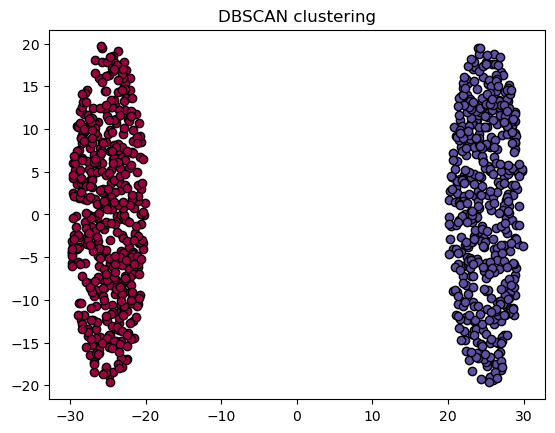

In [18]:
# Plotanje klastera
unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Crna boja za noise, label -1

    class_member_mask = (dbscan.labels_ == k)

    xy = np.concatenate((x[class_member_mask], y[class_member_mask]), axis=1)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN clustering')
plt.show()

## Zadatak 4

Koristeći code dat u nastavku generisati dataset i potom primijeniti k-means i DBscan.  
Grafički prikazati rezultat clusteringa za k-means za k=2, kao i rezultat DBscan-a.

In [19]:
def dataset_zadatak4():
    r = np.random.randint(0, 80, 1000)
    fi = np.random.randint(0, 360, 1000)
    x1 = r*np.cos(fi) + 250
    y1 = r*np.sin(fi) + 250

    r = np.random.normal(160, 10, 1000).round(0)
    fi = np.random.randint(0, 360, 1000)
    x2 = r*np.cos(fi) + 250
    y2 = r*np.sin(fi) + 250
    return np.concatenate((x1, x2)), np.concatenate((y1, y2))

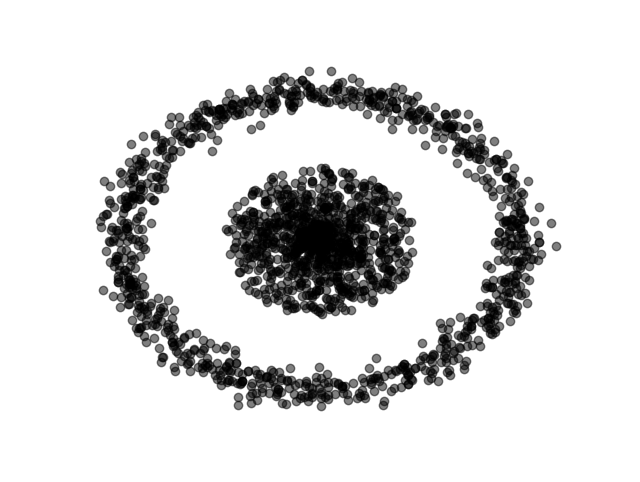

In [20]:
# Vizualizacija
x, y = dataset_zadatak4()

visualization(x, y, 0, 500, 0, 500)

(2000, 2)


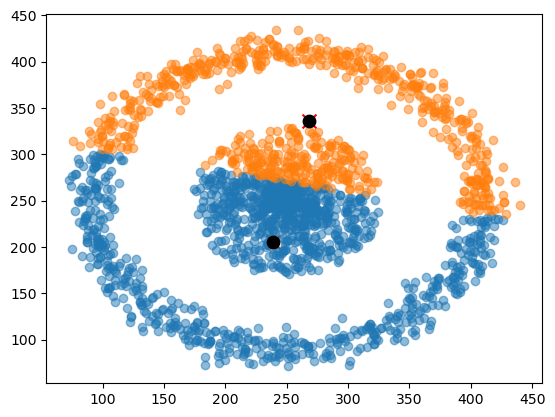

In [21]:
# Primjena K-means klasterovanja za 2 klastera
applayKMeans(2, x, y)

In [22]:
def dataset_zadatak42():
    r = np.random.randint(0, 80, 1000)
    fi = np.random.randint(0, 360, 1000)
    x1 = r*np.cos(fi) + 250
    y1 = r*np.sin(fi) + 250

    r = np.random.normal(160, 10, 1000).round(0)
    fi = np.random.randint(0, 360, 1000)
    x2 = r*np.cos(fi) + 250
    y2 = r*np.sin(fi) + 250
    
    return np.concatenate((x1, x2)).reshape(-1, 1), np.concatenate((y1, y2)).reshape(-1, 1)

In [23]:
x, y = dataset_zadatak42()

In [24]:
# Primjena DBSCAN klasterovanja
dbscan = DBSCAN(eps=20, min_samples=10).fit(np.concatenate((x, y), axis=1))

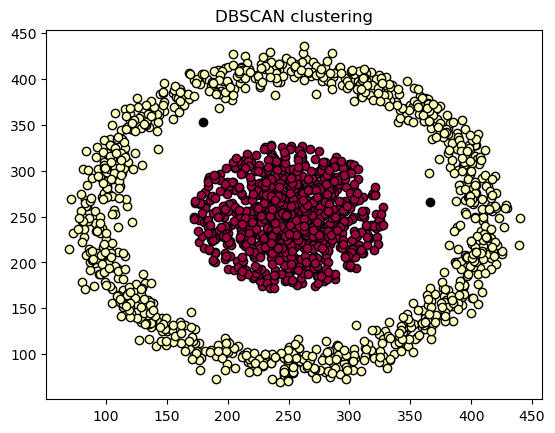

In [25]:
# Plotanje klastera
unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Crna boja za noise, label -1

    class_member_mask = (dbscan.labels_ == k)

    xy = np.concatenate((x[class_member_mask], y[class_member_mask]), axis=1)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN clustering')
plt.show()

In [26]:
# U ovom primjeru vidimo da DBSCAN nadje bolje klastere od KMeans-a, tj bolje odradi grupiranje uzoraka